# Chapter 6 Calculus

In [5]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

## 6.1 微分

微分するには

In [2]:
diff(cos(x),x)

In [3]:
diff(exp(x**2),x)

とする。これらの関数はその場で微分操作を評価するので、未知関数には使えない。(微分方程式については後述)。

2階以上の微分をするには

In [4]:
diff(x**4, x, x, x)

もしくは

In [5]:
diff(x**4, x, 3) #xの3階微分.

とすればよい. 

予想されるように、微分不可能になると

In [6]:
diff(x**4, x, 5)

と0を返す. 

多変数関数、たとえば$$e^{xyz}$$に対しても同様に

In [6]:
expr = exp(x*y*z)

In [8]:
diff(expr,x, y, y, z, z, z, z)

In [9]:
diff(expr, x, y, 2, z, 4) #x,y:2階, z: 4階

In [10]:
diff(expr, x, y, y, z, 4) #x, y, z: 4階

**コメント** `diff`は`Sympy`オブジェクトに対するメソッドとしても呼べる:

In [11]:
expr.diff(x, y, y, z, 4)

#### 微分操作を行いたくないとき

上で述べたように、`diff`関数はその場で式を微分してしまうので、微分方程式には使えない.
その代わりに評価する前の微分を作るには`Derivative`を使えばよい。

In [12]:
deriv = Derivative(expr, x, y, y, z, 4)

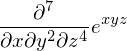

In [13]:
deriv

これを評価するには`doit`メソッドを使う:

In [14]:
deriv.doit() #diff関数で評価するものと同じ.

**コメント**: `Derivative()`は微分方程式などに使える.

## 6.2 積分

In [15]:
integrate(cos(x), x)

**注意**: 不定積分であっても、未定定数は出力されない.

**例**: 定積分$$\int_{0}^{\infty}e^{-x} \, dx$$は

In [16]:
integrate(exp(-x), (x, 0, oo)) #無限大は'o'２つ

と計算できる. 

**例:** 2重積分$$\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}e^{-x^2-y^2}\, dx dy$$は

In [17]:
integrate(exp(-x**2-y**2), (x, -oo, oo), (y, -oo, oo))

と計算できる.

#### 積分が評価できないとき

もし積分が評価できないときは, `Integral`で返す:

In [18]:
expr = integrate(x**x, x)

In [19]:
print(expr)

Integral(x**x, x)


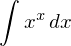

In [20]:
expr

**コメント** 積分方程式に使える.

#### Integralの表式から積分値を評価したいとき

In [21]:
expr = Integral(log(x)**2, x)

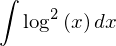

In [22]:
expr

In [23]:
expr.doit() #doit()をつければ評価される.

**コメント**: `integrate()`は合成関数とか、特殊関数に対しても使える!

In [24]:
integ = Integral(x**y*exp(-x), (x, 0, oo))

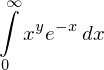

In [25]:
integ

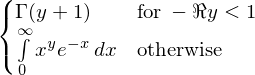

In [26]:
integ.doit()

収束性の場合分けまでやってくれる!!!

## 6.3 極限

極限$$\lim_{x \rightarrow 0}\frac{\sin(x)}{x}$$は

In [27]:
limit(sin(x)/x, x, 0)

と評価できる.

In [28]:
expr = x**2 / exp(x)

In [29]:
expr.subs(x, oo) #oo/ooになる.

In [30]:
limit(expr, x, oo)

*極限操作と代入操作は厳密に区別すべき！*

#### 極限を評価したくないとき

In [4]:
expr = Limit((cos(x) - 1)/x, x, 0)

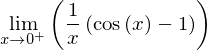

In [5]:
expr

In [7]:
expr.doit() #極限値を評価

#### 極限の方向を決めたいとき(正方向, 負方向)

$$\lim_{x\rightarrow 0^{+}}\frac{1}{x}$$

In [34]:
limit(1/x, x, 0, '+') #第四引数に'+'のオプション

$$\lim_{x \rightarrow 0^{-}}\frac{1}{x}$$

In [8]:
limit(1/x, x, 0, '-') #第四引数に'-'のオプション

## 6.4 べき級数

関数`f(x)`を`x0`周りで`n`次まで展開: `f(x).series(x, x0, n)` (`x0`, `n`は省ける)

In [36]:
expr = exp(sin(x))

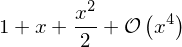

In [37]:
expr.series(x, 0, 4) #最高次はオーダー記号として出力

In [38]:
x + x**3 + x**6 + O(x**4) #大文字のO(オー)でオーダー記号を表せる.

In [39]:
x*O(1) 

**コメント** オーダータームを除去するには

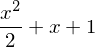

In [40]:
expr.series(x, 0, 4).removeO() #こちらも大文字のO(オー)

とすればよい. なお、オーダータームは原点以外の点の周りの展開でも現れる.

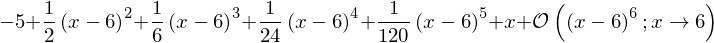

In [41]:
exp(x - 6).series(x, x0=6) #パラメータ引数?

## 6.5 有限差分

省略
http://docs.sympy.org/latest/tutorial/calculus.html#derivatives参照